# Covid-19 - Brasil
## Redes Complexas - 2020/1
Alunos: Johnny Gomes
        e o Nomeriano Neto

In [1]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

### Entendimento dos dados a partir de graficos e outros indicadores 

In [2]:
from bokeh.plotting import figure, output_file, show

In [31]:
# import sys
# print(sys.version)
# print(nx.__version__)

In [4]:
# lê info regionais - divididos por estados, inclusive
df = pd.read_csv("./data/covid_regioes.csv")
df.sample(5)

,regiao,estado,coduf,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
1095,Nordeste,AL,27,26/03/20,13,11,0,0,0
167,Norte,AM,13,19/03/20,12,3,2,0,0
721,Nordeste,PI,22,27/05/20,22,3966,246,134,15
2073,Centro-Oeste,MS,50,21/05/20,21,746,53,17,0
43,Norte,RO,11,02/05/20,18,653,68,23,5


In [5]:
df.shape

(2355, 9)

In [6]:
df.info

<bound method DataFrame.info of             regiao estado  coduf      data  semanaEpi  casosAcumulado  \
0            Norte     RO     11  20/03/20         12               1   
1            Norte     RO     11  21/03/20         12               1   
2            Norte     RO     11  22/03/20         13               3   
3            Norte     RO     11  23/03/20         13               3   
4            Norte     RO     11  24/03/20         13               3   
...            ...    ...    ...       ...        ...             ...   
2350  Centro-Oeste     DF     53  04/06/20         23           12923   
2351  Centro-Oeste     DF     53  05/06/20         23           14208   
2352  Centro-Oeste     DF     53  06/06/20         23           15850   
2353  Centro-Oeste     DF     53  07/06/20         24           16623   
2354  Centro-Oeste     DF     53  08/06/20         24           16629   

      casosNovos  obitosAcumulado  obitosNovos  
0              1                0         

In [7]:
# le dados a partir do pandas dataframe:
# G = nx.from_pandas_edgelist(df, source='pais', target='regiao')
G = nx.from_pandas_edgelist(df, source='regiao', target='estado')


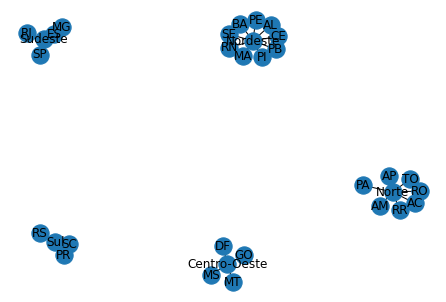

In [8]:
nx.draw(G, with_labels=True)

In [9]:
# 1 - pegar total de casos de cada estado dinamicamente:


In [10]:
# 2 - cria grafo a partir da distribuicao geografica das regioes:
G.add_edges_from(
    [('Norte', 'Nordeste'), ('Norte', 'Centro-Oeste'), ('Nordeste', 'Centro-Oeste'), ('Nordeste', 'Sudeste'),
     ('Centro-Oeste', 'Sudeste'),('Centro-Oeste', 'Sul'), ('Sudeste', 'Sul')])

#G.nodes(data=True)

In [11]:
# atribui cor e diametro diferenciado para nos-regioes:
G.add_node('Norte', dim= 'regiao',
                    totalCasos = 0,
                    totalMortes = 0,
                    temperatura=0)
G.add_node('Nordeste', dim= 'regiao',
                    totalCasos = 0,
                    totalMortes = 0,
                    temperatura=0)
G.add_node('Centro-Oeste', dim= 'regiao',
                    totalCasos = 0,
                    totalMortes = 0,
                    temperatura=0)
G.add_node('Sudeste', dim= 'regiao',
                    totalCasos = 0,
                    totalMortes = 0,
                    temperatura=0)
G.add_node('Sul', dim= 'regiao',
                    totalCasos = 0,
                    totalMortes = 0,
                    temperatura=0)

In [12]:
for node in G.nodes(data=True):
    print(node)

('Norte', {'dim': 'regiao', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('RO', {})
('AC', {})
('AM', {})
('RR', {})
('PA', {})
('AP', {})
('TO', {})
('Nordeste', {'dim': 'regiao', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('MA', {})
('PI', {})
('CE', {})
('RN', {})
('PB', {})
('PE', {})
('AL', {})
('SE', {})
('BA', {})
('Sudeste', {'dim': 'regiao', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('MG', {})
('ES', {})
('RJ', {})
('SP', {})
('Sul', {'dim': 'regiao', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('PR', {})
('SC', {})
('RS', {})
('Centro-Oeste', {'dim': 'regiao', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('MS', {})
('MT', {})
('GO', {})
('DF', {})


In [13]:
color_map = []
for node in G.nodes(data=True):
    if (node[1]):
#         print(node[1][1])
        color_map.append('green')
    else: 
        color_map.append('blue')

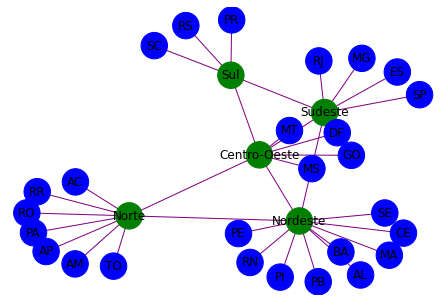

In [14]:
# 2.2.1 - ver a estrutura do grafo:
nx.draw(G, node_color=color_map, edge_color='purple', node_size=700, with_labels=True)

In [15]:
# adiciona arestas por regioes:

# 1. Regiao Sul:
G.add_edges_from(
    [('RS', 'SC'),('SC', 'PR')]) # ok

# 2. Sudeste:
G.add_edges_from(
    [('SP', 'MG'), ('SP', 'RJ'), ('RJ', 'MG'),('RJ', 'ES'),('ES', 'MG')]) # ok

# 3. Centro-Oeste:
G.add_edges_from(
    [('DF', 'GO'), ('GO', 'MT'),('GO', 'MS'),('MT','MS')]) # ok

# 4. Norte:
G.add_edges_from(
    [('TO', 'PA'),('PA', 'AP'),('PA', 'RR'),('PA', 'AM'),('AM', 'AC'),
     ('AM', 'RO'),('AM','RR'),('AC', 'RO')]) # ok

# 5. Nordeste:
G.add_edges_from(
    [('BA', 'SE'), ('BA', 'AL'),('BA', 'PE'),('BA', 'PI'),('PE', 'PB'),
     ('PE', 'CE'),('PE', 'PI'),('CE', 'PI'),('CE', 'PB'),('SE','AL'),
     ('AL','PE'),('CE', 'RN'),('PB', 'RN'),('PI','MA')]) # ok

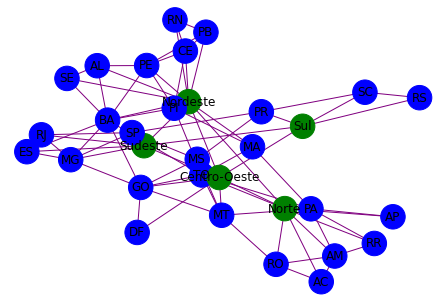

In [29]:
# desenha o grafo com diferenciacao de cores para vertices regioes e estados:
nx.draw(G, node_color=color_map, edge_color='purple', node_size=600, with_labels=True)


In [17]:
# informacoes sobre o grafo atual:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 32\nNumber of edges: 67\nAverage degree:   4.1875'

In [18]:
color_map = []
for node in G.nodes(data=True):
    if (node[1]):
#         print(node[1][1])
        color_map.append('green')
    else: 
        color_map.append('blue')

In [19]:
# mapeia as arestas extra regionais:
G.add_edges_from(
    [('PR', 'SP'),('PR', 'MS'),('ES', 'BA'),('MG', 'BA'),('SP', 'MS'),('MG', 'GO'),
     ('TO', 'GO'),('TO', 'MT'),('TO', 'MA'),('TO','PI'),('TO','BA'),
     ('GO','BA'),('PA','MA'),('PA','MT'),('RO','MT')])

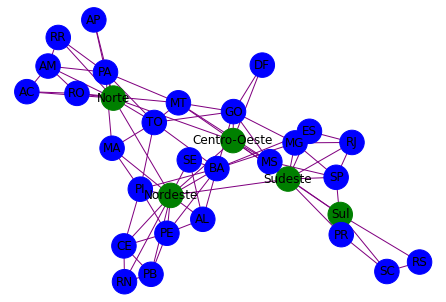

In [20]:
# desenha o grafo em sua estrutura final em relacao vertices a arestas:
nx.draw(G, node_color=color_map, edge_color='purple', node_size=600, with_labels=True)


In [21]:
# 3 - atribuir numero de casos/mortes a cada nó-estado:


In [22]:
# 4 - somar valores dos nós-estado e atribuir a sua respectiva regiao:


In [23]:
# 5 - O diametro do nó é relativo ao numero de casos (usar interpolador entre o menor e maior numero):


In [24]:
# 6 - animar o grafo e adicionar 'hover' com informacoes de numero de casos/mortes e/ou outras:


In [26]:
# grafico do crescimento de novos casos ao longos das semanas (estado == 'TO')


In [27]:
# grafico do crescimento de novos casos ao longos das semanas (estado == 'AM')


In [28]:
# pega total de casos acumulados no Tocantins:


### Documentacao do processo - Pipeline da Produção da Rede Covid-19 - Brasil


Obs.: Esse _pipeline_ foi desenvolvido para trabalhos na área de **Descoberta de Conhecimento**, entretanto a certo ponto os passos bem definidos podem ajudar na compreensão e tratamento dos dados e posterior obtenção e apresentação do conhecimento obtido.

mais informações em: [KDD - Descoberta de Conhecimento em Bases de Dados](https://lume.ufrgs.br/handle/10183/8968)

### 1. Entendimento do dominio da aplicação:

Estudamos sobre Covid-19 e sobre a propagacao do virus pelo mundo

### 2. Criação da base de dados de interesse:

A base de dados foi criada por orgao federal e disponibilizada em:
[Saúde.Gov](https://covid.saude.gov.br/) mais informacoes em [SUS Analítico](https://susanalitico.saude.gov.br/)

### 3. Limpeza de dados e pré processamento:

#### 3.a) Limpeza dos dados:

Dividimos a base original em tres arquivos contendo: 
    1. Dados gerais do pais;
    2. Dados regionais;
    3. Dados estaduais e municipais;
    
Algumas colunas se fizeram desnecessarias, como o numero de habitantes em cada uma dessas microregioes por isso, foram descartadas da base em que trabalhamos.

#### 3.b) Integração dos dados:

Nao houve integracao de dados novos ou externos à base já existente.

#### 3.c) Transformação dos dados:

### 4. Redução e Projeção de Dados:

### 5. Escolha das funções de mineração:

### 6. Escolha dos algoritmos de mineração:

### 7. Mineração:

### 8. Interpretação dos dados:

### 9. Utilização/Publicação/Compartilhamento do conhecimento descoberto: